# Image Modification

- 활용할 이미지
![pepper](https://homepages.cae.wisc.edu/~ece533/images/peppers.png)

In [33]:
from PIL import Image, ImageEnhance, ImageFilter, ImageMath
import matplotlib.pyplot as plt
import os
import image_processing as ip      # 위 추가한 path에서 image_processing.py 모듈을 가져와 임포트합니다. 
import sys

In [1]:
img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/peppers.png'
im = Image.open(img_path)
print(im)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7F48E0F0C810>


## 이미지 출력
- PIL.PngImagePlugin.PngImageFile: png 이미지 데이터라는 뜻.
- image mod=RGB : 이미지 색 공간 RGB라는 뜻
- size=512x512: 가로세로 512
- 0x7FD288135B10 : 이미지 저장되어 있는 메모리 위치

In [3]:
print(im)
print(im.format, im.size, im.mode)
im.show()

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7F48E0F0C810>
PNG (512, 512) RGB
이미지를 확인하세요.ᵕᴗᵕ


In [6]:
x_pixel = 1
y_pixel = 2
xy = (x_pixel,y_pixel)
print(im.getpixel(xy)) # 1pixel의 RGB 보여줌.
print(im.getdata()) # 전체 pixel맵을 반환

(185, 102, 50)


## 이미지 자르기

In [8]:
box = (100,100,400,400)
region = im.crop(box)
region.show()

## 이미지 회전하기
Transpoe():
- FLIP_LEFT_RIGHT 
- FLIP_TOP_BOTTOM
- ROTATE_90
- ROTATE_180
- ROTATE_270

In [9]:
region = region.transpose(Image.ROTATE_180)
region.show()

## 이미지 합치기

In [10]:
im.paste(region, box)
im.show()

## 이미지 Contrast

Text(0.5, 1.0, 'enhanced contrast')

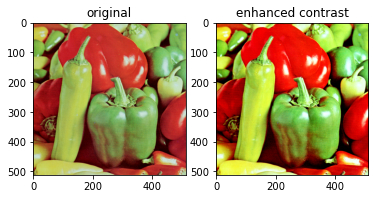

In [13]:
img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/peppers.png'

im = Image.open(img_path)                # original 이미지
enh = ImageEnhance.Contrast(im)    # enhanced contrast 이미지
enh = enh.enhance(1.9) # 기존 대비보다 90% 높여줌.

# 두 이미지를 그려 봅시다
f=plt.figure()
im1 = f.add_subplot(1,2,1)
im1.imshow(im)
im1.set_title("original")

im2 = f.add_subplot(1,2,2)
im2.imshow(enh)
im2.set_title("enhanced contrast")

## 이미지 필터
- BLUR : 이미지를 흐리게 
- EDGE_ENHANCE : 윤곽을 뚜렷하게 
- EMBOSS : 명암 경계에 따라 밝은 영역 또는 어두운 영역으로 대체
- FIND_EDGES : 윤곽만 표시
- SHARPEN : 선명도를 높이는 필터

Text(0.5, 1.0, 'BLUR filter')

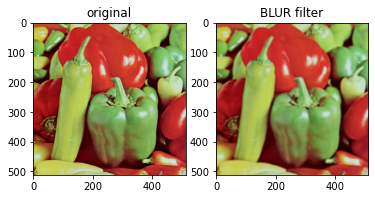

In [15]:
filtered_image = im.filter(ImageFilter.BLUR)  # BLUR filter 이미지

f=plt.figure()
im1 = f.add_subplot(1,2,1)
im1.imshow(im)
im1.set_title("original")

im2 = f.add_subplot(1,2,2)
im2.imshow(filtered_image)
im2.set_title("BLUR filter")

## 이미지 색 공간 변경
- RGB(A): 빨간 초록 파랑
- CMYK: 사이먼, 마젠타, 노랑, 검정
- L: 흑백

In [19]:
greyscale_image = im.convert('L')
greyscale_image.show()

## 이미지 저장

In [20]:
original_img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/peppers.png'
new_img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/modified_peppers.jpg'

im = Image.open(original_img_path)
im.save(new_img_path)

new_im = Image.open(new_img_path)
print(new_im.format, new_im.size, new_im.mode)

JPEG (512, 512) RGB


In [21]:
# PNG 포맷으로 저장합니다. 
another_img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/modified_peppers.png'
im.save(another_img_path)

another_im = Image.open(another_img_path)
print(another_im.format, another_im.size, another_im.mode)

PNG (512, 512) RGB


## 이미지 모듈화

In [27]:
original_img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/chloe.jpg'
new_img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/modified_chloe.jpg'

im = Image.open(original_img_path)   # 모듈.함수 호출
im.save(new_img_path)

'/home/aiffel0036/aiffel/pil_image/assets/peppers.png'

In [42]:
def image_resize(image, height):
    if height == 300:
        return image.resize((800,300))
    else:
        return image.resize((800,600))
def image_rotate(image):
    return image.transpose(Image.ROTATE_180)
def image_change_bw(image):
    return image.convert('L')

In [43]:
import sys
sys.path.append(os.getenv('HOME')+'/aiffel/pil_image')    # 우리가 추가한 모듈의 path를 sys.path에 임시로 추가해 줍니다. 

#import image_processing as ip      # 위 추가한 path에서 image_processing.py 모듈을 가져와 임포트합니다. 

original_img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/chloe.jpg'
result_img_path = os.getenv('HOME')+'/aiffel/pil_image/assets/result_image.jpg'

def img_transfer(original_image, result_image):
    # 원본 이미지를 오픈합니다. 
    im = Image.open(original_img_path)

    # image_processing.image_resize 를 사용하여 (800,600)으로 resize합니다. 
    im_resized_600 = image_resize(im,600)
    # image_processing.image_resize 를 사용하여 (800,300)으로 resize합니다. 
    im_resized_300 = image_resize(im,300)

    # image_processing.image_rotate 를 사용하여 (800,300)짜리 이미지를 180도 회전합니다. 
    im_resized_300_rotate = image_rotate(im_resized_300)

    # im_resized_600에 im_resized_300와 im_resized_300_rotate를 아래위로 붙입니다. 
    box_top = (0,0,800,300)
    box_bottom = (0,300,800,600)
    im_resized_600.paste(im_resized_300_rotate, box_top)
    im_resized_600.paste(im_resized_300,box_bottom)

    # image_processing.image_change_bw 를 사용하여 im_resized_600을 흑백으로 변환합니다.
    im_resized_600 = image_change_bw(im_resized_600)

    # 이미지를 저장합니다. 
    im_resized_600.save(result_image)

# 함수를 호출해서 원본이미지를 새로운 이미지로 변환해서 저장해 봅시다.     
img_transfer(original_img_path, result_img_path)

# 만들어진 이미지를 화면에 출력해 봅시다. 
Image.open(result_img_path).show()

print("⁎ᵕᴗᵕ⁎")

⁎ᵕᴗᵕ⁎
